In [2]:
import pandas as pd
import matplotlib.pyplot as pd
%matplotlib inline

In [64]:
# load data
df = pd.read_csv('final_data_v0-2.csv',  dtype = str)

In [65]:
df.head()

,PBMVendor,PharmacyID,DrugShortName,UnitCost,PharmacyName,PharmacyStreetAddress1,PharmacyCity,PharmacyZip,PharmZip,DrugLabelName
0,MedImpact,59ROCKINGHAMST03038,HYDROCHLOROTHIAZIDE,0.3333333333333333,RITE AID PHARMACY 03310,59 ROCKINGHAM ST,DERRY ...,03038,030,HYDROCHLOROTHIAZIDE
1,MedImpact,718SMYTHRD03104,GABAPENTIN,0.20355555555555555,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,GABAPENTIN
2,MedImpact,718SMYTHRD03104,SANTYL,0.9538333333333333,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,SANTYL
3,MedImpact,718SMYTHRD03104,TORSEMIDE,0.6331666666666667,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,TORSEMIDE
4,MedImpact,288SANDOWNRD03826,OMEPRAZOLE,0.3716666666666667,WALGREENS,288 SANDOWN RD,HAMPSTEAD ...,03826,038,OMEPRAZOLE


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283162 entries, 0 to 3283161
Data columns (total 10 columns):
PBMVendor                 object
PharmacyID                object
DrugShortName             object
UnitCost                  object
PharmacyName              object
PharmacyStreetAddress1    object
PharmacyCity              object
PharmacyZip               object
PharmZip                  object
DrugLabelName             object
dtypes: object(10)
memory usage: 250.5+ MB


In [68]:
# convert 'UnitCost' to floating number
df['UnitCost'] = df['UnitCost'].astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283162 entries, 0 to 3283161
Data columns (total 10 columns):
PBMVendor                 object
PharmacyID                object
DrugShortName             object
UnitCost                  float64
PharmacyName              object
PharmacyStreetAddress1    object
PharmacyCity              object
PharmacyZip               object
PharmZip                  object
DrugLabelName             object
dtypes: float64(1), object(9)
memory usage: 250.5+ MB


In [70]:
df.head()

,PBMVendor,PharmacyID,DrugShortName,UnitCost,PharmacyName,PharmacyStreetAddress1,PharmacyCity,PharmacyZip,PharmZip,DrugLabelName
0,MedImpact,59ROCKINGHAMST03038,HYDROCHLOROTHIAZIDE,0.333333,RITE AID PHARMACY 03310,59 ROCKINGHAM ST,DERRY ...,03038,030,HYDROCHLOROTHIAZIDE
1,MedImpact,718SMYTHRD03104,GABAPENTIN,0.203556,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,GABAPENTIN
2,MedImpact,718SMYTHRD03104,SANTYL,0.953833,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,SANTYL
3,MedImpact,718SMYTHRD03104,TORSEMIDE,0.633167,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,TORSEMIDE
4,MedImpact,288SANDOWNRD03826,OMEPRAZOLE,0.371667,WALGREENS,288 SANDOWN RD,HAMPSTEAD ...,03826,038,OMEPRAZOLE


In [86]:
# clean the white space to Pharmacy City
df['PharmacyCity'] = df['PharmacyCity'].str.strip()

In [89]:
df['PharmacyCity'].head()

0         DERRY
1    MANCHESTER
2    MANCHESTER
3    MANCHESTER
4     HAMPSTEAD
Name: PharmacyCity, dtype: object

In [88]:
# check if we still have any missing values in the dataset
df.isnull().any()

PBMVendor                 False
PharmacyID                False
DrugShortName             False
UnitCost                  False
PharmacyName              False
PharmacyStreetAddress1    False
PharmacyCity              False
PharmacyZip               False
PharmZip                  False
DrugLabelName             False
dtype: bool

In [72]:
# check the summary statistics
df.describe()

,UnitCost
count,3.283162e+06
mean,1.327299e+01
std,2.008334e+02
min,-3.245648e+04
25%,2.428333e-01
50%,7.614286e-01
75%,2.629667e+00
max,3.245648e+04


Text(0.5,1,'Boxplot of UnitCost')

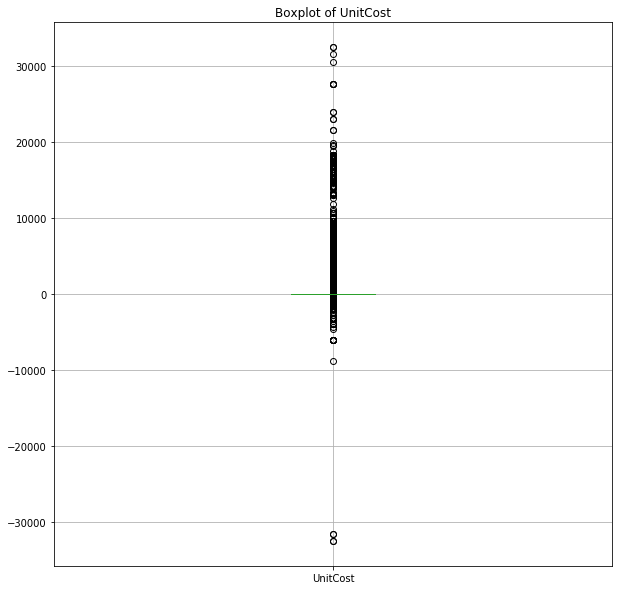

In [75]:
plt.figure(figsize=(10,10))
df.boxplot('UnitCost')
plt.title("Boxplot of UnitCost")

In [76]:
# distribution of PBM
df_PBM = df['PBMVendor'].value_counts()
df_PBM

CVSPAL4000    2317696
Medco          575228
MedImpact      374783
Welldyne        14103
National         1352
Name: PBMVendor, dtype: int64

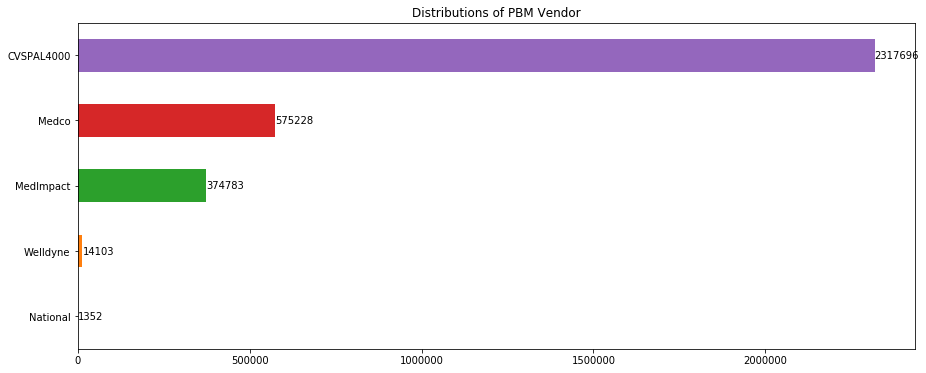

In [93]:
df_PBM.sort_values(ascending = True).plot(kind='barh',figsize = (15,6), title='Distributions of PBM Vendor')

for y, x in enumerate(df_PBM.sort_values(ascending = True)):
    plt.annotate(str(x), xy=(x, y), va='center')

In [78]:
# get the top 20 unique zipcode by counts
df_zipcode = df['PharmacyZip'].value_counts()[:20]
df_zipcode

03756    317047
02128     56820
03246     53344
03301     52579
03431     49844
03820     49445
03060     49312
03038     44227
03784     36671
04401     31746
02150     31185
03743     28579
03264     28475
03063     28311
03110     27672
03103     25705
04011     23907
03109     23813
03257     23555
05819     23075
Name: PharmacyZip, dtype: int64

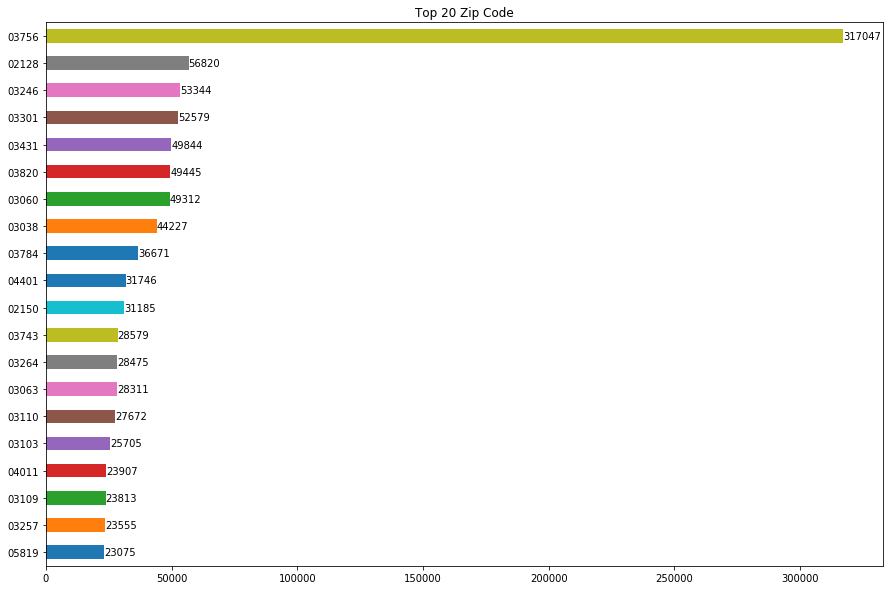

In [79]:
df_zipcode.sort_values(ascending = True).plot(kind='barh',figsize=(15,10),title='Top 20 Zip Code')

for y, x in enumerate(df_zipcode.sort_values(ascending = True)):
    plt.annotate(str(x), xy=(x, y), va='center')

In [80]:
# get the top 20 Pharmacies
df_PharmacyName = df['PharmacyName'].value_counts()[:20]
df_PharmacyName

DARTMOUTH-HITCHCOCK PHCY    315811
CVS PHARMACY                157727
THE PHARMACY CENTER          45745
WENTWORTH DGLAS HOSP EMP     28635
NORTHEASTERN VT REG HOSP     20829
CHESHIRE MEDICAL CTR         19021
PENOBSCOT COMMUNITY HEAL     18535
HANNAFORD FOOD AND DRUG      18161
CVS PHARMACY 00647           16739
CVS PHARMACY 05938           16554
CVS PHARMACY 00639           15589
CVS PHARMACY 00723           15416
CVS PHARMACY 02257           14336
CVS PHARMACY 00640           14259
SAINT VINCENT PHARMACY       13930
CVS #01265                   12933
BREWER MEDICAL CENTER PH     11986
METRO WEST MEDICAL CENTE     11550
WALGREENS #05756             11534
CVS #00496                   11288
Name: PharmacyName, dtype: int64

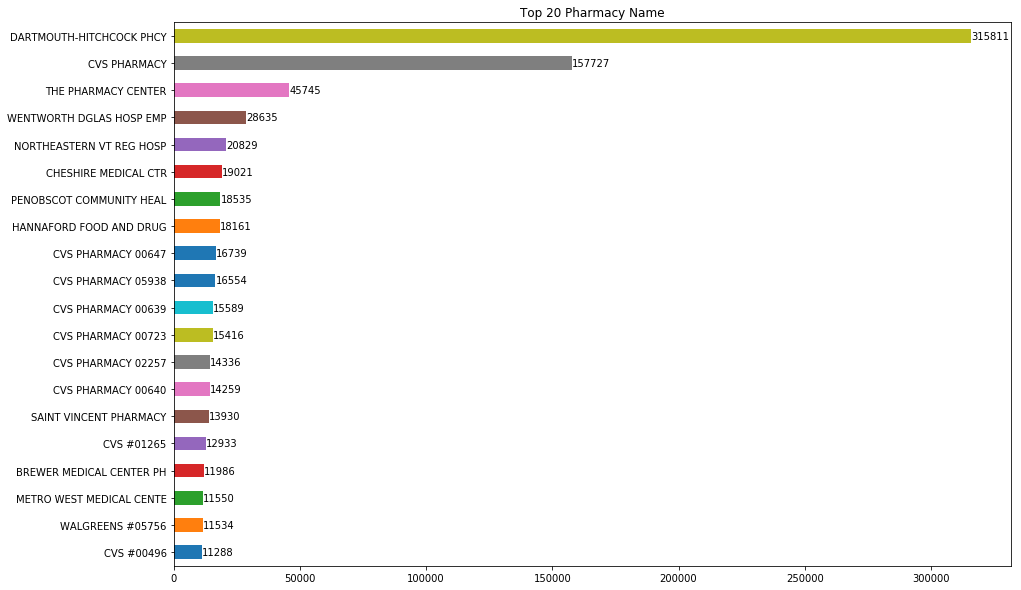

In [81]:
df_PharmacyName.sort_values(ascending = True).plot(kind='barh',figsize=(15,10),title='Top 20 Pharmacy Name')

for y, x in enumerate(df_PharmacyName.sort_values(ascending = True)):
    plt.annotate(str(x), xy=(x, y), va='center')

In [91]:
# get the top 20 States
df_City = df['PharmacyCity'].value_counts()[:20]
df_City

LEBANON         324386
NASHUA           85636
MANCHESTER       84273
BOSTON           76131
CONCORD          59937
WORCESTER        53480
LACONIA          53344
KEENE            49844
DOVER            49525
DERRY            44227
EAST BOSTON      40739
NEW BEDFORD      36986
WEST LEBANON     36671
PLYMOUTH         33815
BANGOR           31748
HUDSON           31643
MILFORD          31494
CHELSEA          31377
BEDFORD          30137
FRAMINGHAM       28958
Name: PharmacyCity, dtype: int64

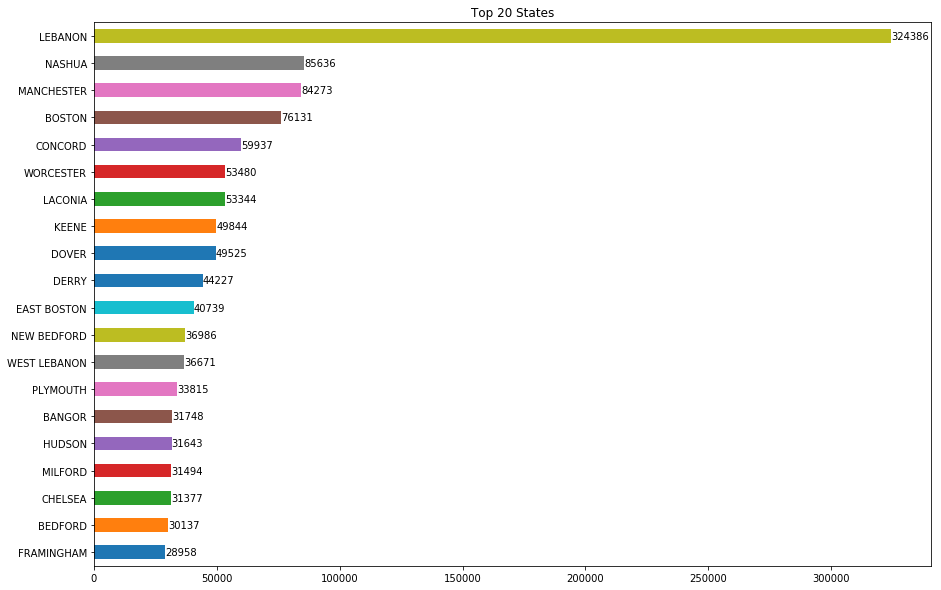

In [92]:
df_City.sort_values(ascending = True).plot(kind='barh',figsize=(15,10),title='Top 20 States')

for y, x in enumerate(df_City.sort_values(ascending = True)):
    plt.annotate(str(x), xy=(x, y), va='center')